# Удаление заднего фона с OpenCV

## тест 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

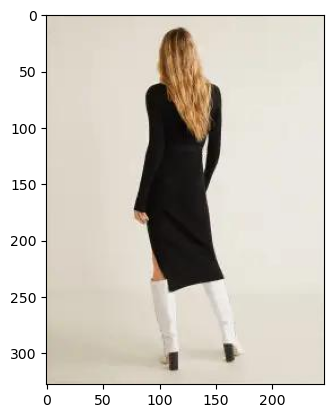

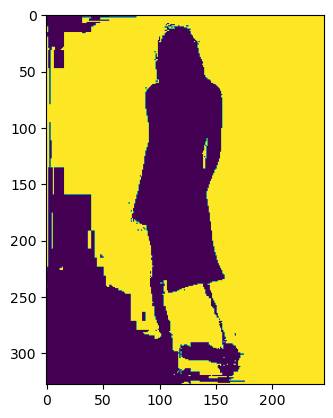

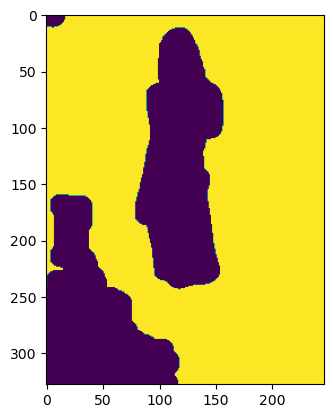

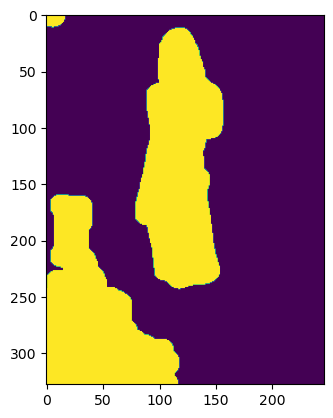

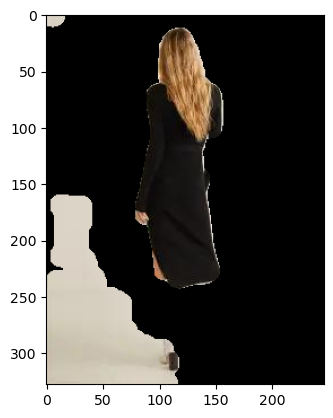

In [26]:
img_path = "./sirius_data/sirius_data/2.jpg"
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
hh, ww = img.shape[:2]

# threshold on white
# Define lower and uppper limits
lower = np.array([200, 200, 200])
upper = np.array([255, 255, 255])

# Create mask to only select black
thresh = cv2.inRange(img, lower, upper)

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# invert morp image
mask = 255 - morph

# apply mask to image
result = cv2.bitwise_and(img, img, mask=mask)


# save results
# cv2.imwrite('pills_thresh.jpg', thresh)
# cv2.imwrite('pills_morph.jpg', morph)
# cv2.imwrite('pills_mask.jpg', mask)
# cv2.imwrite('pills_result.jpg', result)

plt.imshow(thresh)
plt.show()
plt.imshow(morph)
plt.show()
plt.imshow(mask)
plt.show()
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

## тест 2

In [32]:
def bgremove1(myimage):
 
    # Blur to image to reduce noise
    myimage = cv2.GaussianBlur(myimage,(5,5), 0)
 
    # We bin the pixels. Result will be a value 1..5
    bins=np.array([0,51,102,153,204,255])
    myimage[:,:,:] = np.digitize(myimage[:,:,:],bins,right=True)*51
 
    # Create single channel greyscale for thresholding
    myimage_grey = cv2.cvtColor(myimage, cv2.COLOR_BGR2GRAY)
 
    # Perform Otsu thresholding and extract the background.
    # We use Binary Threshold as we want to create an all white background
    ret,background = cv2.threshold(myimage_grey,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
    # Convert black and white back into 3 channel greyscale
    background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)
 
    # Perform Otsu thresholding and extract the foreground.
    # We use TOZERO_INV as we want to keep some details of the foregorund
    ret,foreground = cv2.threshold(myimage_grey,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)  #Currently foreground is only a mask
    foreground = cv2.bitwise_and(myimage,myimage, mask=foreground)  # Update foreground with bitwise_and to extract real foreground
 
    # Combine the background and foreground to obtain our final image
    finalimage = background+foreground
 
    return finalimage

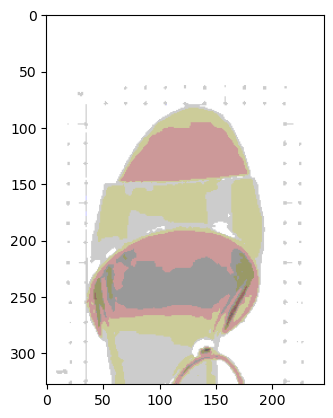

In [39]:
img_path = "./sirius_data/sirius_data/0.jpg"

img = cv2.imread(img_path)

result_img = bgremove1(img)
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))

In [40]:
def bgremove2(myimage):
    # First Convert to Grayscale
    myimage_grey = cv2.cvtColor(myimage, cv2.COLOR_BGR2GRAY)
 
    ret,baseline = cv2.threshold(myimage_grey,127,255,cv2.THRESH_TRUNC)
 
    ret,background = cv2.threshold(baseline,126,255,cv2.THRESH_BINARY)
 
    ret,foreground = cv2.threshold(baseline,126,255,cv2.THRESH_BINARY_INV)
 
    foreground = cv2.bitwise_and(myimage,myimage, mask=foreground)  # Update foreground with bitwise_and to extract real foreground
 
    # Convert black and white back into 3 channel greyscale
    background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)
 
    # Combine the background and foreground to obtain our final image
    finalimage = background+foreground
    return finalimage

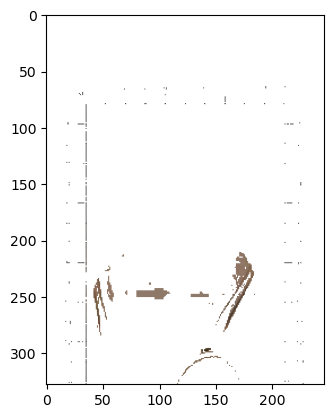

In [47]:
img_path = "./sirius_data/sirius_data/0.jpg"

img = cv2.imread(img_path)

result_img = bgremove2(img)
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))

In [85]:
def bgremove3(myimage):
    # BG Remover 3
    myimage_hsv = cv2.cvtColor(myimage, cv2.COLOR_BGR2HSV)
     
    #Take S and remove any value that is less than half
    s = myimage_hsv[:,:,1]
    s = np.where(s < 120, 0, 1) # Any value below 127 will be excluded
 
    # We increase the brightness of the image and then mod by 255
    v = (myimage_hsv[:,:,2] + 120) % 255
    v = np.where(v > 120, 1, 0)  # Any value above 127 will be part of our mask
 
    # Combine our two masks based on S and V into a single "Foreground"
    foreground = np.where(s+v > 0, 1, 0).astype(np.uint8)  #Casting back into 8bit integer
 
    background = np.where(foreground==0,255,0).astype(np.uint8) # Invert foreground to get background in uint8
    background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)  # Convert background back into BGR space
    foreground=cv2.bitwise_and(myimage,myimage,mask=foreground) # Apply our foreground map to original image
    finalimage = background+foreground # Combine foreground and background
 
    return finalimage

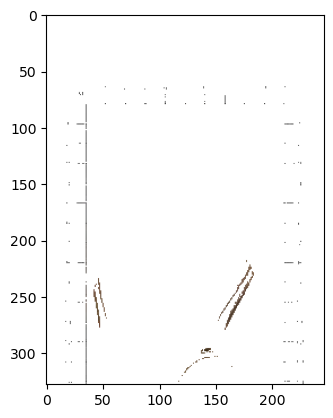

In [87]:
img_path = "./sirius_data/sirius_data/0.jpg"

img = cv2.imread(img_path)

result_img = bgremove3(img)
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))

## тест 3

In [1]:
!pip install rembg -q

In [24]:
import os
from rembg import remove
def remove_background(image_path, output_path="./deleted_background"):
    with open(image_path, 'rb') as i:
        with open(os.path.join(output_path, image_path.split("\\")[-1]), 'wb') as o:
            input_image = i.read()
            output = remove(input_image, bgcolor=[255,255,255,255])
            o.write(output)

In [33]:
import os
import io
from rembg import remove
from PIL import Image

def remove_and_replace_background(image_path, texture_path, output_path="./deleted_background"):
    os.makedirs(output_path, exist_ok=True)

    with open(image_path, 'rb') as i:
        input_image = i.read()
        output_image = remove(input_image)

    input_image = Image.open(image_path)
    texture_image = Image.open(texture_path)

    if texture_image.size[0] < input_image.size[0] or texture_image.size[1] < input_image.size[1]:
        texture_image = texture_image.resize(input_image.size)

    new_image = Image.new('RGBA', input_image.size)
    new_image.paste(texture_image, (0, 0))
    new_image.paste(Image.open(io.BytesIO(output_image)), (0, 0), Image.open(io.BytesIO(output_image)))

    output_image_path = os.path.join(output_path, os.path.basename(image_path))
    new_image.save(output_image_path, format='PNG')

In [35]:
from tqdm import tqdm

folder_path = os.path.join("sirius_data", "sirius_data")
pathes = os.listdir(folder_path)
texture_path = './DHP-2251658929084_2.jpg'

for img_path in tqdm(pathes):
    if 'jpg' in img_path:
        remove_and_replace_background(os.path.join(folder_path, img_path), texture_path)

100%|██████████| 472/472 [09:26<00:00,  1.20s/it]


In [ ]:
# bramarco/blip-image-captioning-base-fashion-finetuned

In [37]:
!pip install transformers -q

In [29]:
import os
from tqdm import tqdm
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to("cuda")

folder_path = os.path.join("deleted_background")
pathes = os.listdir(folder_path)

photo_descriptions = {}
for img_path in tqdm(pathes):
    if 'jpg' in img_path:
        raw_image = Image.open(os.path.join(folder_path, img_path))
        inputs = processor(raw_image, return_tensors="pt").to("cuda")
        
        out = model.generate(**inputs)
        text = processor.decode(out[0], skip_special_tokens=True)
        photo_descriptions[img_path.split("\\")[-1]] = text

100%|██████████| 471/471 [01:32<00:00,  5.08it/s]


In [30]:
print(photo_descriptions)

{'0.jpg': 'a pair of beige shoes with a gold ring', '1.jpg': 'a woman in a black and white striped shirt and black pants', '10.jpg': 'a woman in a red pajamas and a white polka dot print pajamas', '100.jpg': 'a woman walking in the middle of a white wall', '101.jpg': 'a pair of glasses on a white background', '102.jpg': 'a little girl in a black jumpsuit with a white background', '103.jpg': 'a little girl with a red hat and a green dress', '104.jpg': 'a pair of shorts with a white background', '105.jpg': 'a woman wearing a pink coat and jeans', '106.jpg': 'the plaid plaid plaid plaid plaid plaid plaid plaid plaid plaid plaid plaid plaid plaid plaid plaid plaid plaid', '107.jpg': 'a man wearing a brown leather glove with holes on it', '108.jpg': 'a green palette with a brush and a palette in the box', '109.jpg': 'a red heart shaped drop on a white surface', '11.jpg': 'a pair of red gloves with a white background', '110.jpg': 'a woman in a black top and black shorts', '111.jpg': 'thermo 